<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [2]:
bike = pd.read_csv('train.csv')
bike.head(30)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## EDA

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Data Preprocessing

In [5]:
pd.crosstab(bike.season,bike.weather)

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


<AxesSubplot:>

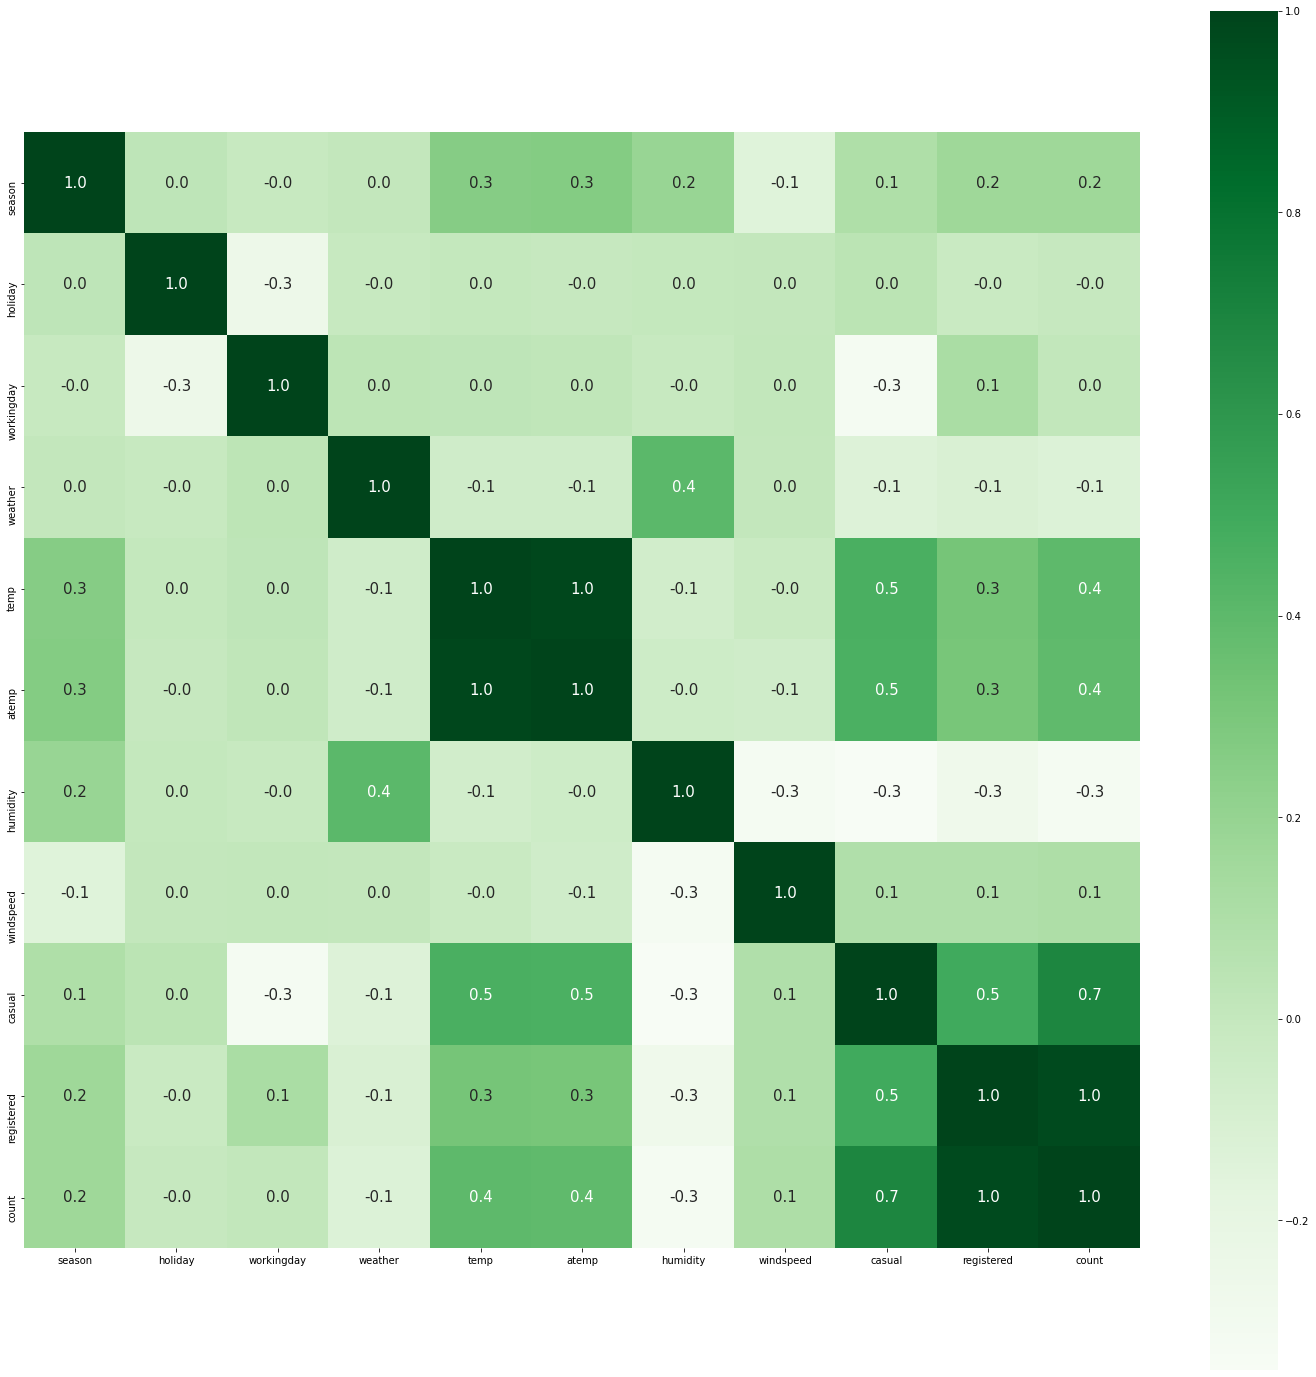

In [6]:
bike_corr = bike.corr()
plt.figure(figsize=(25,25))
sns.heatmap(bike_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Strorytelling - Visualization

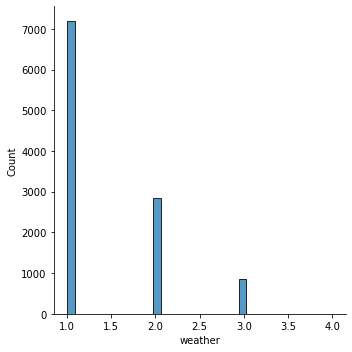

In [7]:
sns.displot(bike,x='weather')

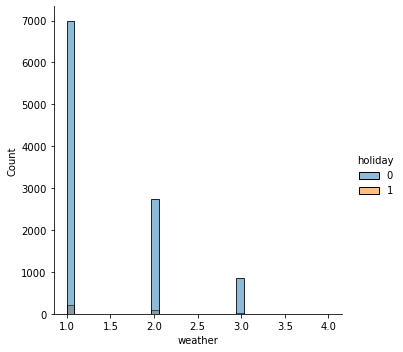

In [8]:
sns.displot(bike,x='weather',hue='holiday')

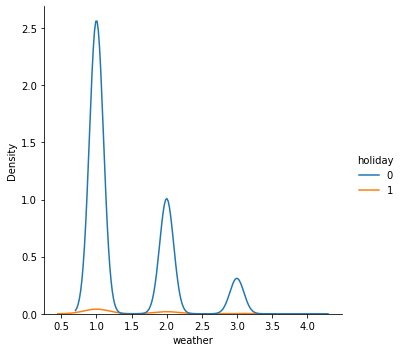

In [9]:
sns.displot(bike,x='weather',hue='holiday',kind='kde')

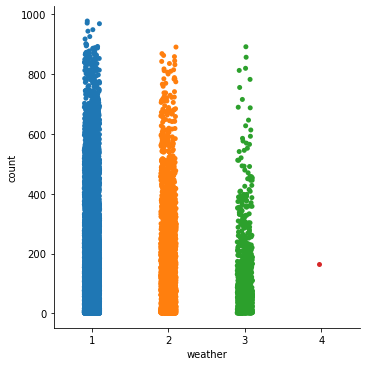

In [10]:
sns.catplot(x='weather',y='count',data=bike)

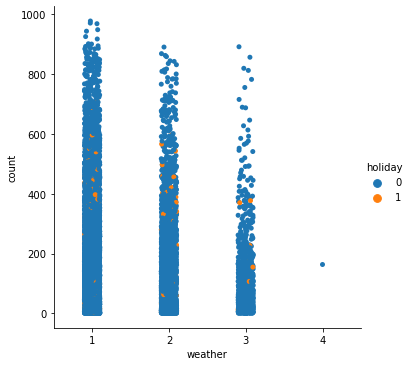

In [11]:
sns.catplot(x='weather',y='count',hue='holiday',data=bike)

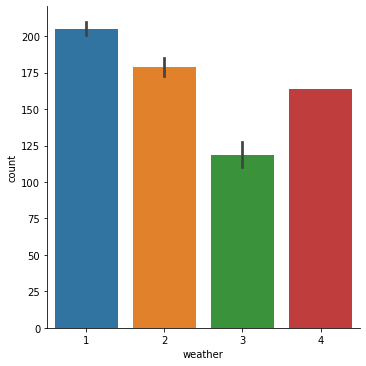

In [12]:
sns.catplot(x='weather',y='count',data=bike,kind='bar')

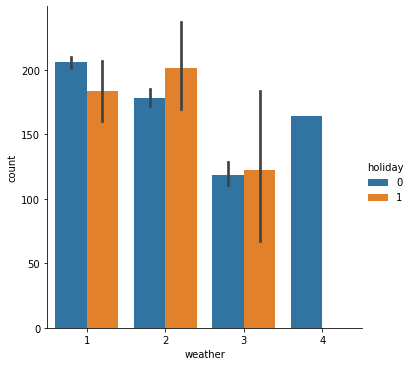

In [13]:
sns.catplot(x='weather',y='count',hue='holiday',data=bike,kind='bar')

## Train your model (Regression)

### Simple Linear Regression (SLR)

In [14]:
X = bike[['temp']]
y = bike['count']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [16]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
 
slr.fit(X_train, y_train)

LinearRegression()

### SLR Evaluation

In [17]:
from sklearn import metrics

In [18]:
y_pred = slr.predict(X_train)

In [19]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.15338956811520044
MAE: 126.3619891013409
MSE: 27519.638667797877
RMSE: 165.89044176141638


In [20]:
print(y_pred)
print(y_train)

[171.4391707  164.00855881 208.59223016 ... 134.28611125 268.03712528
 126.85549935]
5083     176
1468      13
3999     305
1567      13
6116      26
        ... 
6017      46
709       51
10679    334
8366     131
1146      99
Name: count, Length: 7620, dtype: int64


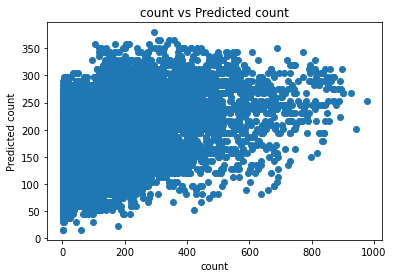

In [21]:
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

### Multiple Linear Regression (MLR)

In [22]:
X = bike.drop(['datetime'],axis=1)
X.drop(['count'],axis=1,inplace=True)
X.drop(['casual'],axis=1,inplace=True)
X.drop(['registered'],axis=1,inplace=True)
y = bike[['count']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [24]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

### MLR Evaluate

In [25]:
y_pred = mlr.predict(X_train)

In [26]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.2566951662409642
MAE: 116.65509607404677
MSE: 24161.621065235897
RMSE: 155.44008834671928


In [27]:
print(y_pred)
print(y_train)

[[131.64831507]
 [199.28060833]
 [200.24973071]
 ...
 [177.15144966]
 [258.04219652]
 [ 83.60923689]]
       count
5083     176
1468      13
3999     305
1567      13
6116      26
...      ...
6017      46
709       51
10679    334
8366     131
1146      99

[7620 rows x 1 columns]


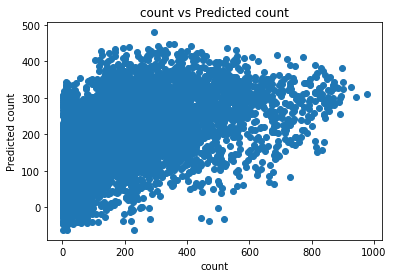

In [28]:
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

In [29]:
y_predtest = mlr.predict(X_test)

In [30]:
print('R^2:',metrics.r2_score(y_test, y_predtest))
print('MAE:',metrics.mean_absolute_error(y_test, y_predtest))
print('MSE:',metrics.mean_squared_error(y_test, y_predtest))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))

R^2: 0.2699707860451419
MAE: 116.60147238400252
MSE: 24471.294043915837
RMSE: 156.43303373621518


In [31]:
print(y_predtest)
print(y_test)

[[289.292402  ]
 [277.1941055 ]
 [103.32162684]
 ...
 [157.10284419]
 [242.20530108]
 [ 93.05347543]]
       count
3039     247
7091     286
10193     20
8986     677
5856      19
...      ...
1455     134
3495     193
9953      10
10058    445
1923      58

[3266 rows x 1 columns]


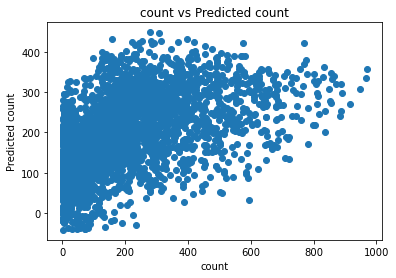

In [32]:
plt.scatter(y_test, y_predtest)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

### Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:

poly_features = PolynomialFeatures(degree=2)   
X_train_quadratic = poly_features.fit_transform(X_train)

quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
y_train_predicted = quadratic.predict(X_train_quadratic)
   

In [35]:
metrics.r2_score(y_train, y_train_predicted)

0.30739422901272406

In [36]:
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [37]:
metrics.r2_score(y_test, y_test_predicted)

0.3100639334608528

In [38]:

poly_features = PolynomialFeatures(degree=3)   
X_train_cubic = poly_features.fit_transform(X_train)

cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
y_train_predicted = cubic.predict(X_train_cubic)
   

In [39]:
metrics.r2_score(y_train, y_train_predicted)

0.3385855133488379

In [40]:
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))
metrics.r2_score(y_test, y_test_predicted)

0.3309536473679333

In [41]:
poly_features = PolynomialFeatures(degree=4)   
X_train_degree4 = poly_features.fit_transform(X_train)

degree4 = LinearRegression()

degree4.fit(X_train_degree4, y_train)
     
y_train_predicted = degree4.predict(X_train_degree4)
   

In [42]:
metrics.r2_score(y_train, y_train_predicted)

0.3798286428965192

In [43]:
y_test_predicted = degree4.predict(poly_features.fit_transform(X_test))
metrics.r2_score(y_test, y_test_predicted)

0.3069684346034415

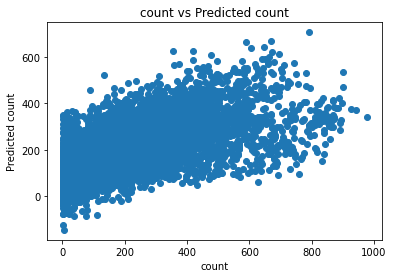

In [48]:
plt.scatter(y_train, y_train_predicted)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

## Test Result

In [44]:
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')

In [45]:
test.drop(['datetime'],axis=1,inplace=True)
y_t = degree4.predict(poly_features.fit_transform(test))
y_t

array([[104.98922346],
       [ 55.04845793],
       [ 55.04845793],
       ...,
       [ 91.97736646],
       [ 84.03407792],
       [ 85.74001416]])

In [46]:
y_t = pd.DataFrame(y_t,columns=['count'])

In [47]:

datetime = bike[['datetime']]
y_t = pd.concat([datetime,y_t],axis=1)
y_t

,datetime,count
0,2011-01-01 00:00:00,104.989223
1,2011-01-01 01:00:00,55.048458
2,2011-01-01 02:00:00,55.048458
3,2011-01-01 03:00:00,92.484901
4,2011-01-01 04:00:00,92.484901
...,...,...
10881,2012-12-19 19:00:00,NaN
10882,2012-12-19 20:00:00,NaN
10883,2012-12-19 21:00:00,NaN
10884,2012-12-19 22:00:00,NaN
